<a href="https://colab.research.google.com/github/nomadcoding28/yolov8/blob/main/yolov8setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This just keep track of the directory we will be using in the future


In [1]:
import os
Home =os.getcwd()
print(Home)

/content


## **Installing** **yolov8**

Source:you can install it using "pip install ultralytics" or gitclone the ultralytics repo locally on your PC

In [2]:
!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/107.7 GB disk)


we are going to use an instance of YOLO while using python SDK hence the need

In [3]:
from ultralytics import YOLO

This is used to display an image from the source

In [4]:
from IPython.display import display, Image

There two  ways of working with import dataset or images


1.   CLI Method
2.   Python-SDK Method



# **CLI method**

**task**:detect,segmentation ,classification,pose

**mode**: predict ,train, validation,export ,track

**model**:yolov8n.pt(pre-trained model)

**conf**:condifence

**source**:path

**save** : to true to save the image

In [5]:
%cd {Home}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="https://djl.ai/examples/src/test/resources/dog_bike_car.jpg" save=True

/content
100% 6.25M/6.25M [00:00<00:00, 21.0MB/s]
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 160k/160k [00:00<00:00, 1.41MB/s]
image 1/1 /content/dog_bike_car.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 277.9ms
Speed: 16.1ms preprocess, 277.9ms inference, 28.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


to display the image in the dest path

/content


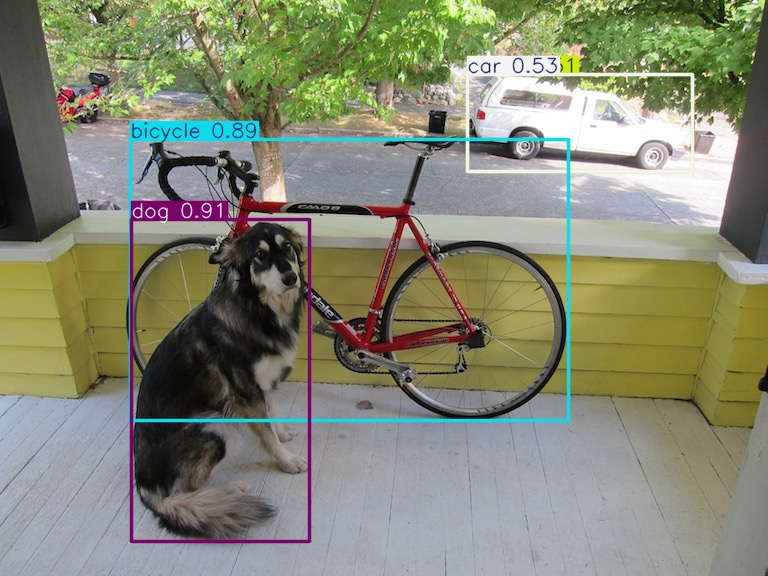

In [6]:
%cd {Home}
Image(filename='runs/detect/predict/dog_bike_car.jpg', height=600)

# **Python-SDK Method**

Similar to what mentioned in the CLI component

In [7]:
YOLO("yolov8n.pt").predict(
    source="https://djl.ai/examples/src/test/resources/dog_bike_car.jpg",
    conf=0.25
)


Found https://djl.ai/examples/src/test/resources/dog_bike_car.jpg locally at dog_bike_car.jpg
image 1/1 /content/dog_bike_car.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 249.6ms
Speed: 17.9ms preprocess, 249.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# Getting started


In [2]:
%cd {Home}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="66Xc6cxH6d5Y0LtRaUrB")
project = rf.workspace("speedgun").project("hawkeye-ykvxp")
version = project.version(16)
dataset = version.download("yolov8")


/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.70, to fix: `pip install ultralytics==8.0.196`


In [11]:
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="66Xc6cxH6d5Y0LtRaUrB")

# Load your project
project = rf.workspace("speedgun").project("hawkeye-ykvxp")
version = project.version(16)

# Download the dataset
dataset = version.download("yolov8")

# Check where the dataset was downloaded
print(f"Dataset downloaded to: {dataset.location}")

# Locate the .yaml file
yaml_path = f"{dataset.location}/data.yaml"

# Check if the .yaml file exists
import os
if not os.path.exists(yaml_path):
    print(f"Error: The dataset YAML file does not exist at {yaml_path}")
else:
    print(f"Dataset YAML file exists at {yaml_path}")

# If the file exists, proceed with training
!yolo task=detect mode=train model=yolov8n.pt data={yaml_path} epochs=25 imgsz=640





loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.70, to fix: `pip install ultralytics==8.0.196`
Dataset downloaded to: /content/Hawkeye-16
Error: The dataset YAML file does not exist at /content/Hawkeye-16/data.yaml
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Hawkeye-16/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fals

In [8]:
%cd {Home}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/.yaml epochs=25 imgsz=640

/content
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Hawkeye-16/.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,